<a href="https://colab.research.google.com/github/Chandra-Sekhar-Dutta/AI-Powered-Resume-Generator/blob/main/3d_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install trimesh open3d matplotlib numpy

import trimesh
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/3d mesh diagrams')

ValueError: Mountpoint must not contain a space.

In [13]:
mesh_dir = "/content/drive/MyDrive/Mixar_3D_Objects"

# List all .obj files in the directory
mesh_files = [os.path.join(mesh_dir, f) for f in os.listdir(mesh_dir) if f.endswith('.obj')]
print("Found mesh files:")
for f in mesh_files:
    print(" →", f)


Found mesh files:
 → /content/drive/MyDrive/Mixar_3D_Objects/branch.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/talwar.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/fence.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/girl.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/explosive.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/table.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/cylinder.obj
 → /content/drive/MyDrive/Mixar_3D_Objects/person.obj


In [16]:
def load_mesh(file_path):
    mesh = trimesh.load(file_path)
    vertices = np.array(mesh.vertices)
    print(f"\n Mesh: {os.path.basename(file_path)}")
    print(f"Number of vertices: {vertices.shape[0]}")
    print(f"Min: {vertices.min(axis=0)}")
    print(f"Max: {vertices.max(axis=0)}")
    print(f"Mean: {vertices.mean(axis=0)}")
    print(f"Std: {vertices.std(axis=0)}")
    return mesh, vertices
meshes = {}
for f in mesh_files:
    mesh, vertices = load_mesh(f)
    meshes[f] = (mesh, vertices)


 Mesh: branch.obj
Number of vertices: 2767
Min: [-0.851562  0.       -0.464844]
Max: [0.849609 1.900391 0.462891]
Mean: [0.0754427  1.0873903  0.12196689]
Std: [0.3433802  0.45699113 0.20006684]

 Mesh: talwar.obj
Number of vertices: 1668
Min: [-0.031922  0.       -0.117146]
Max: [0.031922 1.       0.117146]
Mean: [ 0.02169364  0.30279517 -0.00436462]
Std: [0.01116646 0.23686893 0.04678924]

 Mesh: fence.obj
Number of vertices: 1088
Min: [-0.5     0.     -0.0225]
Max: [0.5     0.84317 0.0225 ]
Mean: [-0.00350762  0.41047549 -0.00044118]
Std: [0.34579423 0.25404616 0.01098078]

 Mesh: girl.obj
Number of vertices: 8284
Min: [-0.5       0.       -0.181411]
Max: [0.5      0.904419 0.181411]
Mean: [0.0021131  0.40338488 0.01400205]
Std: [0.17875615 0.21438917 0.06178976]

 Mesh: explosive.obj
Number of vertices: 2812
Min: [-0.199625 -0.       -0.197126]
Max: [0.199625 1.       0.197126]
Mean: [ 0.04288751  0.52911263 -0.00344591]
Std: [0.1150964  0.38994128 0.0946764 ]

 Mesh: table.obj
Nu

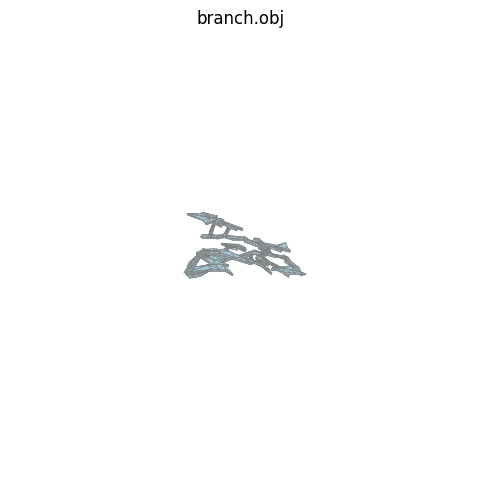

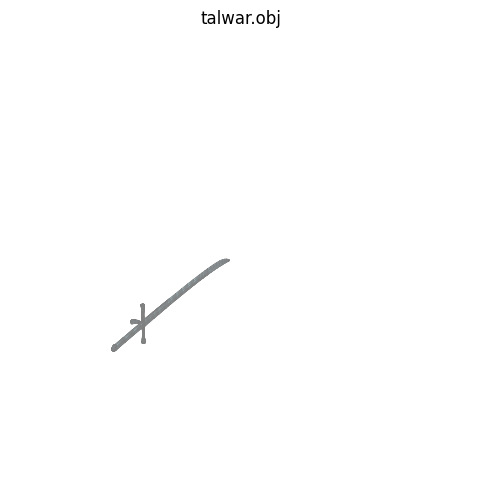

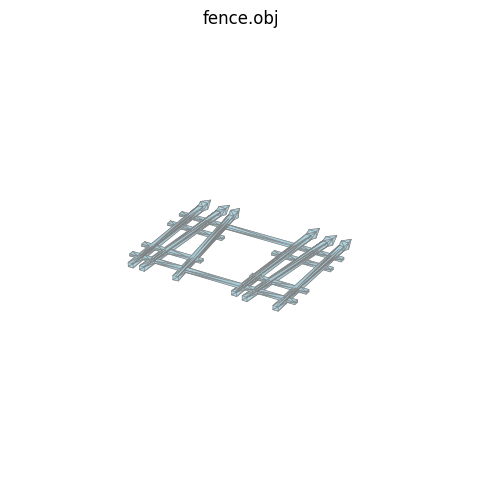

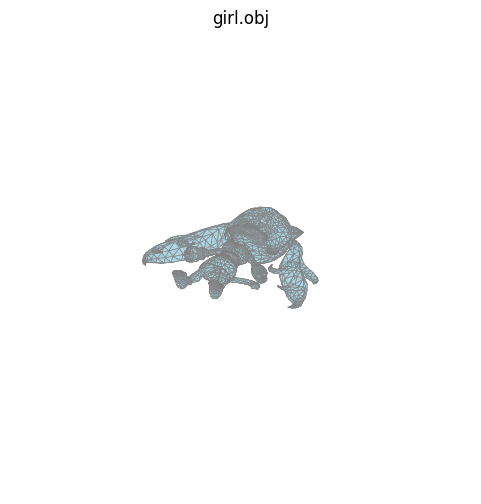

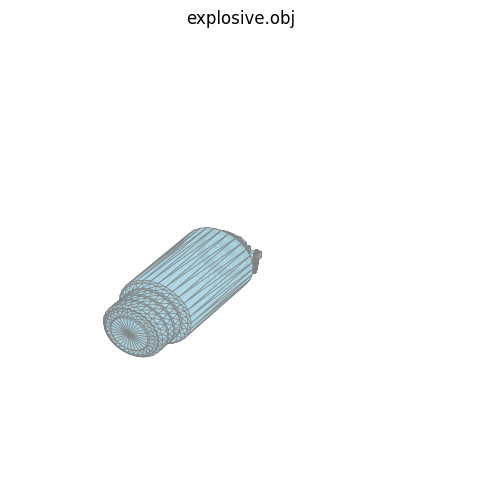

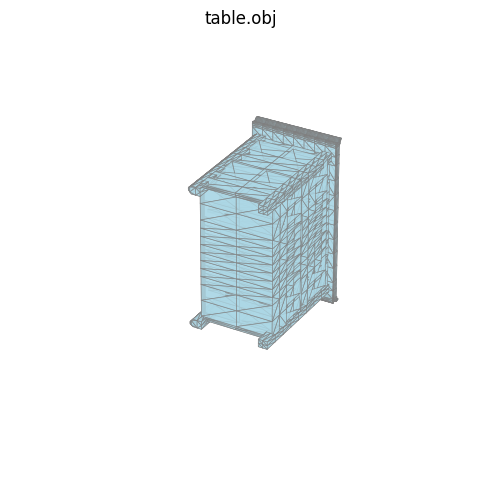

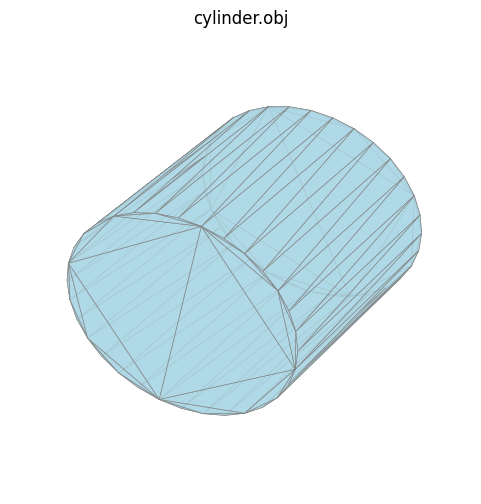

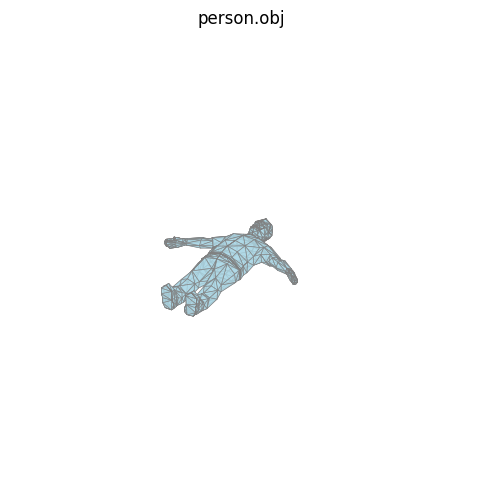

In [23]:
# Matplotlib-only 3D mesh renderer (no pyglet)
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
import os

def show_mesh_matplotlib(mesh, title="3D Mesh View"):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    verts = mesh.vertices
    faces = mesh.faces

    mesh_collection = Poly3DCollection(verts[faces], alpha=0.8,
                                       facecolor='lightblue', edgecolor='gray', linewidth=0.5)
    ax.add_collection3d(mesh_collection)

    scale = verts.flatten()
    ax.auto_scale_xyz(scale, scale, scale)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

#  Show all meshes
for f, (mesh, vertices) in meshes.items():
    show_mesh_matplotlib(mesh, title=os.path.basename(f))



 Processing branch ...
 branch processed successfully

 Processing talwar ...
 talwar processed successfully

 Processing fence ...
 fence processed successfully

 Processing girl ...
 girl processed successfully

 Processing explosive ...
 explosive processed successfully

 Processing table ...
 table processed successfully

 Processing cylinder ...
 cylinder processed successfully

 Processing person ...
 person processed successfully


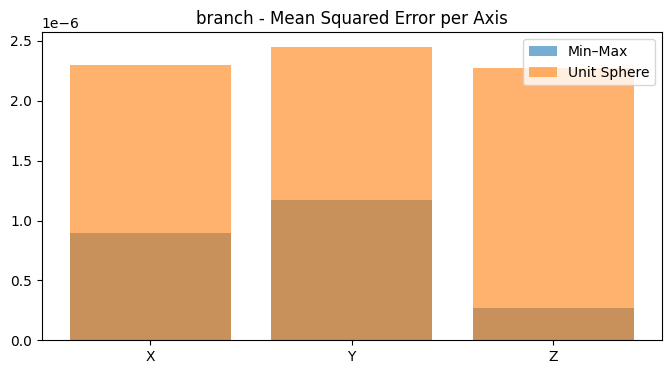


branch Error Summary:
Min–Max → MSE: [8.98318473e-07 1.17372106e-06 2.72539235e-07], MAE: [0.00081867 0.00093304 0.00045029]
Unit Sphere → MSE: [2.29703998e-06 2.44960028e-06 2.27156909e-06], MAE: [0.00129714 0.0013687  0.00130859]


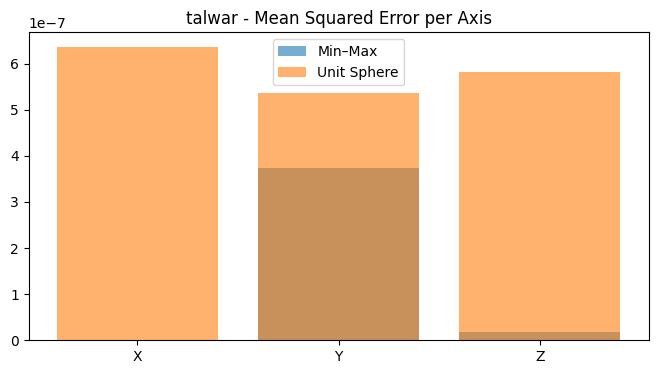


talwar Error Summary:
Min–Max → MSE: [1.37800267e-09 3.72731219e-07 1.80210473e-08], MAE: [3.13819074e-05 5.37271638e-04 1.16456568e-04]
Unit Sphere → MSE: [6.35992613e-07 5.36801845e-07 5.81003446e-07], MAE: [0.00068833 0.00060875 0.00065469]


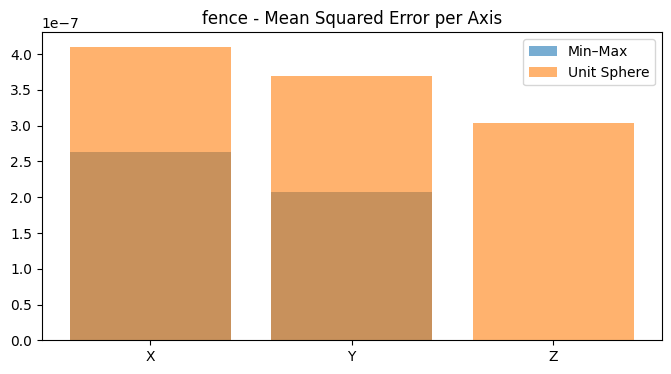


fence Error Summary:
Min–Max → MSE: [2.63612385e-07 2.07302259e-07 8.53662300e-11], MAE: [4.25808725e-04 3.89324104e-04 3.88131792e-06]
Unit Sphere → MSE: [4.09951957e-07 3.69032253e-07 3.03290120e-07], MAE: [0.00057008 0.00058442 0.00047194]


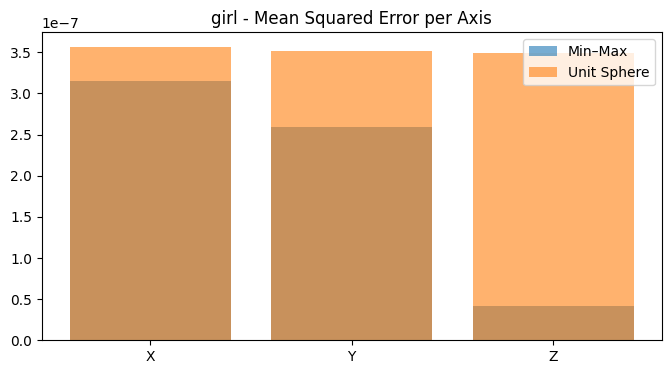


girl Error Summary:
Min–Max → MSE: [3.15105011e-07 2.59158797e-07 4.19619274e-08], MAE: [0.00049106 0.00044113 0.00017727]
Unit Sphere → MSE: [3.56440252e-07 3.50914517e-07 3.49220684e-07], MAE: [0.00052133 0.00051594 0.00051168]


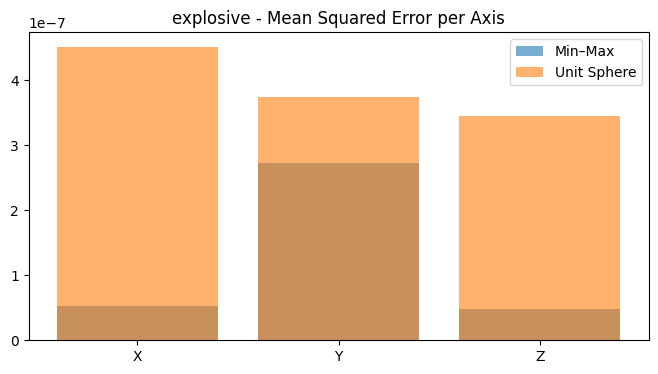


explosive Error Summary:
Min–Max → MSE: [5.25126155e-08 2.72555351e-07 4.80774000e-08], MAE: [0.00019612 0.00043891 0.00019157]
Unit Sphere → MSE: [4.51231960e-07 3.74721076e-07 3.44511428e-07], MAE: [0.00059826 0.00054367 0.00049785]


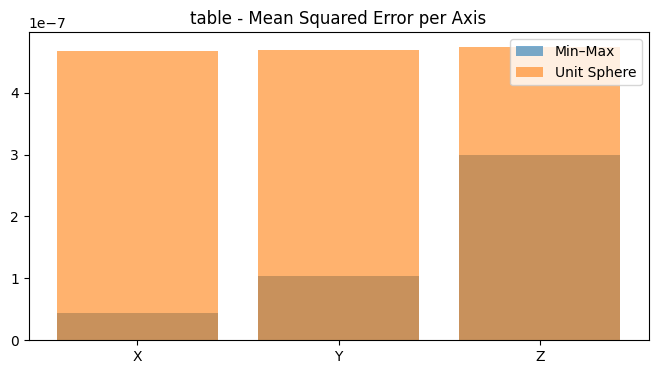


table Error Summary:
Min–Max → MSE: [4.33102077e-08 1.03099218e-07 3.00024412e-07], MAE: [0.00016382 0.00027134 0.00048505]
Unit Sphere → MSE: [4.67868783e-07 4.68174621e-07 4.73810228e-07], MAE: [0.00059993 0.00059955 0.00059727]


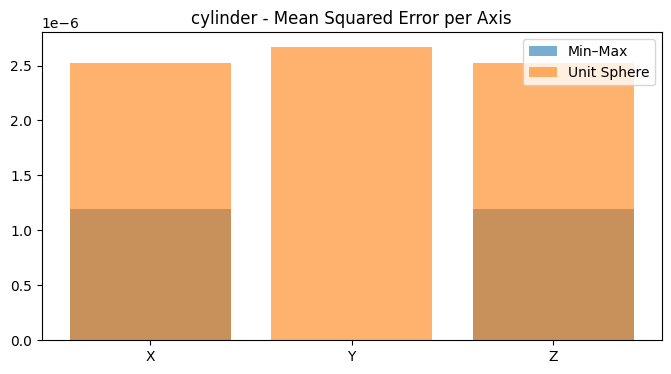


cylinder Error Summary:
Min–Max → MSE: [1.19493876e-06 0.00000000e+00 1.19493876e-06], MAE: [0.00091642 0.         0.00091642]
Unit Sphere → MSE: [2.52570235e-06 2.66928610e-06 2.52570235e-06], MAE: [0.00138242 0.00138242 0.00138242]


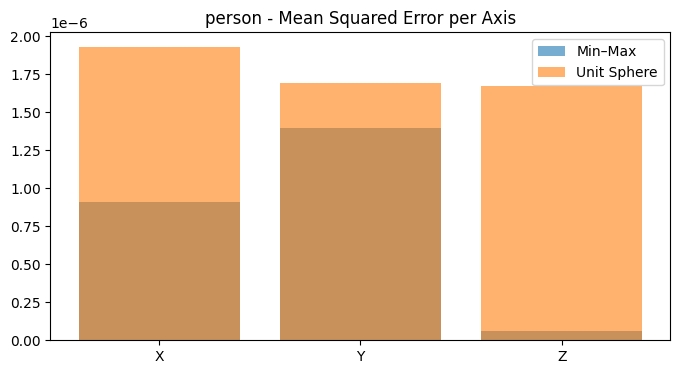


person Error Summary:
Min–Max → MSE: [9.08930802e-07 1.39680386e-06 6.16090983e-08], MAE: [0.00082038 0.00104014 0.00021506]
Unit Sphere → MSE: [1.92904450e-06 1.69011413e-06 1.67016195e-06], MAE: [0.00120334 0.00111357 0.00110085]

 Overall Observations:
branch: Best normalization → Min–Max (lower reconstruction error)
talwar: Best normalization → Min–Max (lower reconstruction error)
fence: Best normalization → Min–Max (lower reconstruction error)
girl: Best normalization → Min–Max (lower reconstruction error)
explosive: Best normalization → Min–Max (lower reconstruction error)
table: Best normalization → Min–Max (lower reconstruction error)
cylinder: Best normalization → Min–Max (lower reconstruction error)
person: Best normalization → Min–Max (lower reconstruction error)


In [22]:
#STEP 3: Normalization + Quantization Functions

def min_max_normalize(vertices):
    v_min, v_max = vertices.min(axis=0), vertices.max(axis=0)
    norm = (vertices - v_min) / (v_max - v_min)
    return norm, v_min, v_max

def unit_sphere_normalize(vertices):
    center = vertices.mean(axis=0)
    shifted = vertices - center
    scale = np.max(np.linalg.norm(shifted, axis=1))
    norm = shifted / scale
    return norm, center, scale

def quantize(vertices, n_bins=1024):
    q = np.floor(vertices * (n_bins - 1)).astype(np.int32)
    return q

def dequantize(q, n_bins=1024):
    return q / (n_bins - 1)

def min_max_denormalize(vertices_norm, v_min, v_max):
    return vertices_norm * (v_max - v_min) + v_min

def unit_sphere_denormalize(vertices_norm, center, scale):
    return vertices_norm * scale + center

def compute_error(original, reconstructed):
    mse = np.mean((original - reconstructed)**2, axis=0)
    mae = np.mean(np.abs(original - reconstructed), axis=0)
    return mse, mae


#  STEP 4: Process Each Mesh and Save Outputs
output_dir = "/content/output_meshes"
os.makedirs(output_dir, exist_ok=True)

results = {}

for path, (mesh, vertices) in meshes.items():
    name = os.path.splitext(os.path.basename(path))[0]
    print(f"\n Processing {name} ...")

    # --- Min–Max Normalization ---
    norm1, vmin, vmax = min_max_normalize(vertices)
    q1 = quantize(norm1)
    dq1 = dequantize(q1)
    recon1 = min_max_denormalize(dq1, vmin, vmax)

    # --- Unit Sphere Normalization ---
    norm2, center, scale = unit_sphere_normalize(vertices)
    q2 = quantize((norm2 + 1) / 2)  # convert [-1,1] → [0,1]
    dq2 = dequantize(q2)
    recon2 = unit_sphere_denormalize(dq2 * 2 - 1, center, scale)

    # --- Compute Errors ---
    mse1, mae1 = compute_error(vertices, recon1)
    mse2, mae2 = compute_error(vertices, recon2)

    results[name] = {
        "MinMax": {"MSE": mse1, "MAE": mae1},
        "UnitSphere": {"MSE": mse2, "MAE": mae2}
    }

    # --- Save Reconstructed Meshes ---
    trimesh.Trimesh(vertices=recon1, faces=mesh.faces).export(f"{output_dir}/{name}_minmax_reconstructed.obj")
    trimesh.Trimesh(vertices=recon2, faces=mesh.faces).export(f"{output_dir}/{name}_unitsphere_reconstructed.obj")

    print(f" {name} processed successfully")



#  STEP 5: Visualization and Error Plotting

for name, res in results.items():
    mse1, mse2 = res["MinMax"]["MSE"], res["UnitSphere"]["MSE"]
    mae1, mae2 = res["MinMax"]["MAE"], res["UnitSphere"]["MAE"]

    axes = ['X', 'Y', 'Z']
    plt.figure(figsize=(8, 4))
    plt.bar(axes, mse1, alpha=0.6, label='Min–Max')
    plt.bar(axes, mse2, alpha=0.6, label='Unit Sphere')
    plt.title(f"{name} - Mean Squared Error per Axis")
    plt.legend()
    plt.show()

    print(f"\n{name} Error Summary:")
    print(f"Min–Max → MSE: {mse1}, MAE: {mae1}")
    print(f"Unit Sphere → MSE: {mse2}, MAE: {mae2}")


# STEP 6: Overall Observation Summary
print("\n Overall Observations:")
for name, res in results.items():
    minmax_mse = np.mean(res["MinMax"]["MSE"])
    unitsphere_mse = np.mean(res["UnitSphere"]["MSE"])
    better = "Unit Sphere" if unitsphere_mse < minmax_mse else "Min–Max"
    print(f"{name}: Best normalization → {better} (lower reconstruction error)")

In [19]:
os.chdir("/content/output_meshes")
print("Current directory:", os.getcwd())


Current directory: /content/output_meshes


In [20]:
!cp -r /content/output_meshes "/content/drive/MyDrive/3d mesh diagrams/reconstructed_meshes"


cp: cannot create directory '/content/drive/MyDrive/3d mesh diagrams/reconstructed_meshes': No such file or directory


In [21]:
from google.colab import files
files.view("/content/output_meshes")


<IPython.core.display.Javascript object>